### anisotropy_etgs
---
This script selects some massive ETGs to have a look at how the anisotropy of DM and stars are related.

---

In [23]:
import numpy as np
import h5py
import split_population
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ---------------------------------------------------------------------------------------
# Loading in TNG100 sample with z=0 info to select samples.
tng100_main = pd.read_csv('/Users/cd201/morphology_misalignment/catalogues/tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = split_population.tng100_pa_sample(tng100_main)

# Breaking down morphology (deviations from sfms).
QU, _, _ = split_population.SFMS_breakdown(tng100_pa)

In [9]:
# selecting only massive etgs.
massive_etgs_subfind = QU.subfind_id.values[QU.stel_mass.values > 10**11]

In [14]:
# loading in anisotropy info for complete mock MaNGA sample.
hf = h5py.File('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/tng100_mpl8_velocity_anisotropy.hdf5')  
list(hf.keys())

['DM_beta_sigma',
 'DM_beta_vel',
 'DM_beta_vel_err',
 'num_effective_radii',
 'physical_radii_kpc',
 'snapnum',
 'stellar_beta_sigma',
 'stellar_beta_vel',
 'stellar_beta_vel_err',
 'subfind_id']

In [20]:
# masking values for selected ETGs only.
mask = np.in1d(hf['subfind_id'][()], massive_etgs_subfind)

#### 1. Plotting for one ETG only.

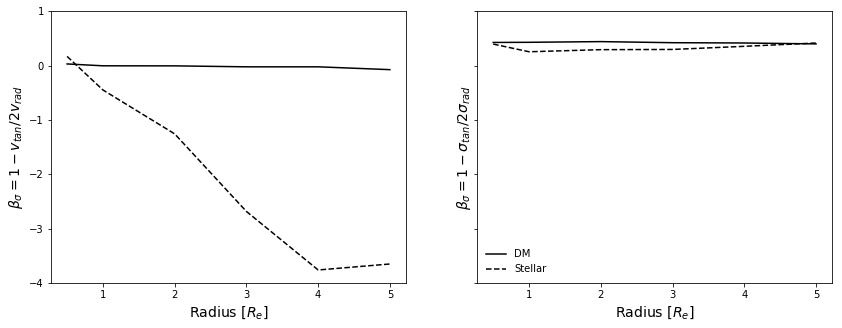

In [42]:
fig, ax = plt.subplots(1,2,  figsize=(14,5), sharex='all', sharey='all')

ax[0].plot(hf['num_effective_radii'][()][mask][0], hf['DM_beta_vel'][()][mask][0], label=r'DM', color='k')
ax[0].plot(hf['num_effective_radii'][()][mask][0], hf['stellar_beta_vel'][()][mask][0], label=r'Stellar', color='k', linestyle='dashed')  
ax[0].set_ylabel(r'$\beta_{\sigma} = 1 - v_{tan} / 2 v_{rad}$', fontsize=14)
ax[0].set_xlabel(r'Radius [$R_e$]', fontsize=14)

ax[1].plot(hf['num_effective_radii'][()][mask][0], hf['DM_beta_sigma'][()][mask][0], label=r'DM', color='k')
ax[1].plot(hf['num_effective_radii'][()][mask][0], hf['stellar_beta_sigma'][()][mask][0], label=r'Stellar', color='k', linestyle='dashed')  
ax[1].set_ylabel(r'$\beta_{\sigma} = 1 - \sigma_{tan} / 2 \sigma_{rad}$', fontsize=14)
ax[1].set_xlabel(r'Radius [$R_e$]', fontsize=14)

ax[1].legend(frameon=False)
ax[1].set_ylim([-4, 1])
plt.show()